   # PANDAS SALES ANALYSIS

---

## OBJECTIVE

Upon initial inspection of the data, we can start thikig of some question about it that we would want to answer

Q1: What is the over all sales trend?

Q2: Which are the top 10 product by sales

Q3: Which are the most selling product

Q4: Which is the most preferred Ship Mode

Q5: Which are the most profitable category and sub-category

# Import Libraries

In [91]:
# DATA MANIPLATION

import pandas as pd

from datetime import datetime, date 

# DATA VISUALIZATION

import matplotlib.pyplot as plt

import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


# Import data set

In [2]:
data= pd.read_csv("C:/Users/User/Desktop/superstore/superstore_sales.csv")

In [3]:
# shows first five rows
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
# display all coloums and rows
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [5]:
# last five rows
data.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,12/31/2014,1/4/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,12/31/2014,1/5/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,12/31/2014,1/2/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,12/31/2014,1/6/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,12/31/2014,1/4/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [6]:
data.shape

(51290, 21)

In [7]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
# A concise summry of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

Now we can do further analysis on our data to answer our questions. Before that, we should see if there are any missing values in our data set. To check if there are any missing values in the entire data set we use the isnull function, then see if there are any values.

We’re lucky we have such a nice data set and with no missing values. While we won’t focus on it in this post, a data scientist will spend their time cleaning (or wrangling ) the data. Since we don’t have any missing data, we can start doing further analysis on our data. 

In [9]:
# checking the missing values

data.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Next, we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us. The mean, or average. The standard deviation, or how spread out the data is. The minimum and maximum value of each column The number of items that fall within the first, second, and third percentiles.

In [10]:
# genrating descriptive analysis Summary
data.describe().round()

,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0
mean,3.0,0.0,29.0,26.0,2013.0
std,2.0,0.0,174.0,57.0,1.0
min,1.0,0.0,-6600.0,0.0,2011.0
25%,2.0,0.0,0.0,3.0,2012.0
50%,3.0,0.0,9.0,8.0,2013.0
75%,5.0,0.0,37.0,24.0,2014.0
max,14.0,1.0,8400.0,934.0,2014.0


# EXPLORATORY DATA ANALYSIS

### What is the overall sale trend

In [11]:
data.head(1)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.14,35.46,Medium,2011


In [12]:
data['order_date'].min()

'1/1/2011'

In [13]:
data['order_date'].max()

'9/9/2014'

In [14]:
# replace comma with empty space for sale
data['sales'] =data['sales'].str.replace(',','')

In [15]:
# change the object data type into integer
data['sales'] = data['sales'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  int32  
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [17]:
# convert order_date time into real date and time using pandas
data['order_date']=pd.to_datetime(data['order_date'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  object        
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  int32         
 15  qu

In [19]:
# getting months_year from order_date
data['month_year']=data['order_date'].apply(lambda x:x.strftime('%Y-%m'))

In [20]:
data['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
5        2011-01
6        2011-01
7        2011-01
8        2011-01
9        2011-01
10       2011-01
11       2011-01
12       2011-01
13       2011-01
14       2011-01
15       2011-01
16       2011-01
17       2011-01
18       2011-01
19       2011-01
20       2011-01
21       2011-01
22       2011-01
23       2011-01
24       2011-01
25       2011-01
26       2011-01
27       2011-01
28       2011-01
29       2011-01
30       2011-01
31       2011-01
32       2011-01
33       2011-01
34       2011-01
35       2011-01
36       2011-01
37       2011-01
38       2011-01
39       2011-01
40       2011-01
41       2011-01
42       2011-01
43       2011-01
44       2011-01
45       2011-01
46       2011-01
47       2011-01
48       2011-01
49       2011-01
50       2011-01
51       2011-01
52       2011-01
53       2011-01
54       2011-01
55       2011-01
56       2011-01
57       2011-01
58       2011-

In [21]:
# grouping month_year by sale
data_trend = data.groupby('month_year').sum()['sales'].reset_index()

In [22]:
data_trend

,month_year,sales
0,2011-01,98902
1,2011-02,91152
2,2011-03,145726
3,2011-04,116927
4,2011-05,146762
5,2011-06,215214
6,2011-07,115518
7,2011-08,207570
8,2011-09,290230
9,2011-10,199070


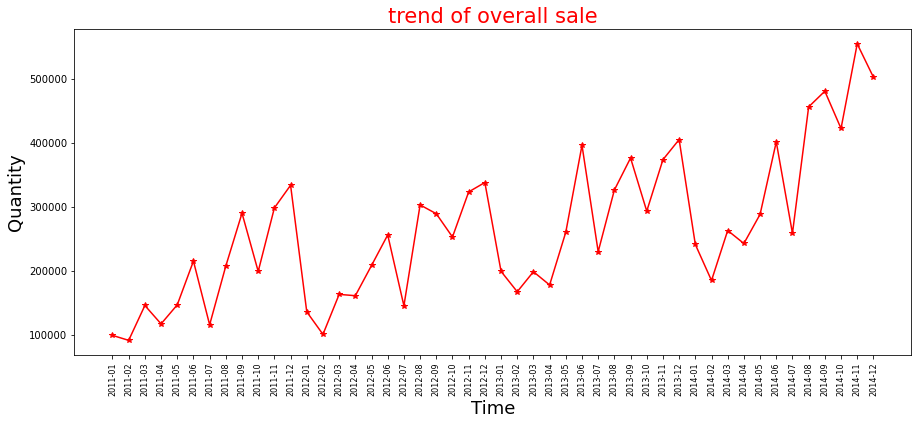

In [25]:
plt.figure(figsize=(15,6))
plt.plot(data_trend['month_year'],data_trend['sales'], color='r',marker='*' )
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Time' ,size =18)
plt.ylabel('Quantity',size=18)
plt.title('trend of overall sale',color='red',size=21)
plt.show()

# Q 2 Which are the top 10 product by sales

In [ ]:
# defination of DATA FRAME

In [53]:
#Grouping product name column

prod_sales= pd.DataFrame(data.groupby('product_name').sum()['sales'])

In [54]:
prod_sales

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25
"#10 Gummed Flap White Envelopes, 100/Box",42
#10 Self-Seal White Envelopes,109
"#10 White Business Envelopes,4 1/8 x 9 1/2",489
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",285
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",176
#6 3/4 Gummed Flap White Envelopes,72
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",2706


In [55]:
# sorting sells product
prod_sales= prod_sales.sort_values('sales',ascending=False)

In [56]:
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86936
"Cisco Smart Phone, Full Size",76441
"Motorola Smart Phone, Full Size",73159
"Nokia Smart Phone, Full Size",71904
Canon imageCLASS 2200 Advanced Copier,61600
"Hon Executive Leather Armchair, Adjustable",58200
"Office Star Executive Leather Armchair, Adjustable",50667
"Harbour Creations Executive Leather Armchair, Adjustable",50120
"Samsung Smart Phone, Cordless",48654


# Q3: Which are the most selling product

In [58]:
# most selling product
most_selling_product= pd.DataFrame(data.groupby('product_name').sum()['quantity'])


In [59]:
most_selling_product

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",21
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",13
#6 3/4 Gummed Flap White Envelopes,9
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",14


In [60]:
most_selling_product= most_selling_product.sort_values('quantity',ascending= False)



In [65]:
most_selling_product[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


# Q4: Which is the most preferred Ship Mode

In [84]:
most_preferred_ship_mode = pd.DataFrame(data.groupby('ship_mode').sum()['sales'])

In [85]:
most_preferred_ship_mode

,sales
ship_mode,
First Class,1831067
Same Day,667202
Second Class,2565747
Standard Class,7578889


In [89]:
most_preferred_ship_mode=most_preferred_ship_mode.sort_values('sales',ascending= False)


In [90]:
most_preferred_ship_mode

,sales
ship_mode,
Standard Class,7578889
Second Class,2565747
First Class,1831067
Same Day,667202


In [76]:
most_preferred_ship_mode_q = pd.DataFrame(data.groupby('ship_mode').sum()['quantity'])

In [77]:
most_preferred_ship_mode_q

,quantity
ship_mode,
First Class,26039
Same Day,9230
Second Class,35724
Standard Class,107319


In [ ]:
most_preferred_ship_mode =most_preferred_ship_mode.sort_values()

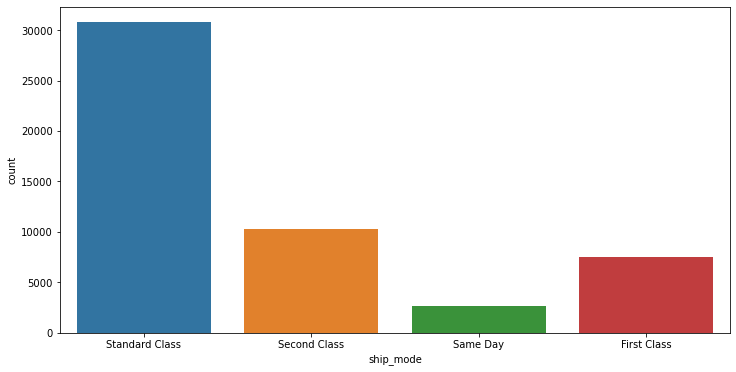

In [92]:
# setting the figure size
plt.figure(figsize=(12,6))
#placing the ship mode
sns.countplot(data['ship_mode'])
plt.show()

# Q5: Which are the most profitable category and sub-category

In [97]:
most_profitable = pd.DataFrame(data.groupby('category').sum()['profit'])

In [98]:
most_profitable

,profit
category,
Furniture,286782.25380
Office Supplies,518473.83430
Technology,663778.73318


In [99]:
most_profitable=most_profitable.sort_values('profit',ascending= False)

In [100]:
most_profitable

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


In [101]:
most_profitable_sub = pd.DataFrame(data.groupby('sub_category').sum()['profit'])

In [102]:
most_profitable_sub

,profit
sub_category,
Accessories,129626.30620
Appliances,141680.58940
Art,57953.91090
Binders,72449.84600
Bookcases,161924.41950
Chairs,141973.79750
Copiers,258567.54818
Envelopes,29601.11630
Fasteners,11525.42410


In [105]:
most_profitable_sub=most_profitable_sub.sort_values('profit',ascending=False)

In [106]:
most_profitable_sub

,profit
sub_category,
Copiers,258567.54818
Phones,216717.00580
Bookcases,161924.41950
Chairs,141973.79750
Appliances,141680.58940
Accessories,129626.30620
Storage,108461.48980
Binders,72449.84600
Paper,59207.68270


In [109]:
most_profitable_c_s= pd.DataFrame(data.groupby(['category','sub_category']).sum()['profit'])

In [110]:
most_profitable_c_s

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [115]:
most_profitable_c_s=most_profitable_c_s.sort_values(['category','sub_category'],ascending=False)

In [116]:
most_profitable_c_s

profit
category        sub_category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950